In [69]:
# import TensorFlow as TF
import pandas as pd
import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [2]:

df = pd.read_csv('data.csv')
data_top = df.head()
copy = df.copy() 

# 1 - Remove rows where the target column (Scope1) is NaN.

copy = copy[copy['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].notna()] # drop all rows with NaN in target column

copy = copy.reset_index() 



# 2 - Replace all NaN from the attribute columns and replace for mean of that column

#copy = copy.fillna(copy.mean())
#col_names = copy.columns
#sub2[col_names].fillna((sub2[col_names].mean()), inplace=True)

# 3 - Group rows by organization ID

# org_ids = list(copy['GTAP country'])
# list_set = set(org_ids)
# unique = list(list_set)

# copy = copy.groupby(['GTAP country'])

# dictionary = {} 

# for item in unique:
#     df_id = copy.get_group(item)
#     dictionary[item] = df_id


def create_dict(target_var, df): 
    org_ids = list(df[target_var]) 
    list_set = set(org_ids) # get unique elements
    unique = list(list_set) # place them in a list 

    df = df.groupby([target_var]) 

    dictionary = {} 

    for item in unique:
        df_id = df.get_group(item)
        dictionary[item] = df_id
    
    return dictionary
    

# dictionaries per target variable:

GTAP_sector_dict = create_dict('GTAP sector', copy)

GTAP_country_dict = create_dict('GTAP country', copy)



key_list = list(GTAP_sector_dict.keys())

print(key_list)

#print(GTAP_sector_dict)

# in the dictionary, we want to replace all the NaN of the values for the means of those columns.


# # check missing values >> columns with lots of missing values are not useful. 
# missing_values_df = copy.isnull().sum().sort_values(ascending=False).head()
# print(missing_values_df)

# # replace NaN in column for mean of column with Imputer 
# imp = SimpleImputer(missing_values='NaN', strategy='mean')
# imp = imp.fit(copy)



#print(replace_NaN(GTAP_sector_dict))    



['Air transport', 'Human health and social work activities', 'Petroleum, coal products', 'Textiles', 'Machinery and equipment nec', 'Sugar cane, sugar beet', 'Ferrous metals', 'Motor vehicles and parts', 'Crops nec', 'Insurance', 'Real estate activities', 'Wearing apparel', 'Transport equipment nec', 'Manufactures nec', 'Null', 'Bovine cattle, sheep and goats, horses', 'Electrical equipment', 'Fishing', 'Construction', 'Forestry', 'Animal products nec', 'Processed rice', 'Recreational and other services', 'Vegetables, fruit, nuts', 'Oil', 'Gas', 'Water', 'Chemical products', 'Basic pharmaceutical products', 'Metals nec', 'Trade', 'Accommodation, Food and service activities', 'Wood products', 'Food products nec', 'Water transport', 'None', 'Rubber and plastic products', 'Wheat', 'Other Extraction', 'Mineral products nec', 'Coal', 'Communication', 'Beverages and tobacco products', 'Business services nec', 'Financial services nec', 'Computer, electronic and optical products', 'Warehousing

In [3]:
# function for filling NaN's (with mean)
def fill_nan(df, column_name):
    mean_value=df[column_name].mean()
    df[column_name].fillna(value=mean_value, inplace=True)
    return df


organization_id
5        AxesSubplot(0.125,0.125;0.775x0.755)
6        AxesSubplot(0.125,0.125;0.775x0.755)
11       AxesSubplot(0.125,0.125;0.775x0.755)
15       AxesSubplot(0.125,0.125;0.775x0.755)
17       AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
14950    AxesSubplot(0.125,0.125;0.775x0.755)
14952    AxesSubplot(0.125,0.125;0.775x0.755)
14953    AxesSubplot(0.125,0.125;0.775x0.755)
14954    AxesSubplot(0.125,0.125;0.775x0.755)
14955    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, Length: 4103, dtype: object

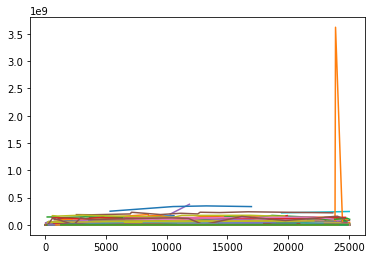

In [4]:
copy.groupby("organization_id")['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].plot(x='StatementDetails.FinancialPeriodFiscalYear',y='EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')
# .mean()


# org_dict = create_dict('organization_id', copy)



# print(list(GTAP_country_dict))
# print(org_dict.type)
# print(list(copy.columns.values))



In [74]:
# regr = linear_model.LinearRegression()
# regr.fit(diabetes_X_train, diabetes_y_train)
# diabetes_y_pred = regr.predict(diabetes_X_test)

# polynomial regression 

dict_id = create_dict('GTAP sector', copy)
air = dict_id['Air transport']
# print(air)
Y = air['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']
X = air.loc[:, ['StatementDetails.FinancialPeriodFiscalYear', 'EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues', 'EmissionIndicators.NOxEmissionsToRevenues']]

# filling missing values with mean 
X = fill_nan(X, 'EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues')
X = fill_nan(X, 'EmissionIndicators.NOxEmissionsToRevenues')
print(X)
X = np.array(X)
# X = X.reshape(-1,1) # alleen voor 1 input variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,Y_train)
predictions = polyreg.predict(X_test)

# print("Coefficients: \n", polyreg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

print('ytest', Y_test)
print(predictions)

       StatementDetails.FinancialPeriodFiscalYear  \
198                                          2013   
336                                          2011   
427                                          2014   
455                                          2017   
488                                          2009   
...                                           ...   
24678                                        2015   
24679                                        2010   
24770                                        2019   
24935                                        2012   
25028                                        2014   

       EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues  \
198                                           860.007572           
336                                          1155.559121           
427                                          1187.299487           
455                                           867.054573           
488                    

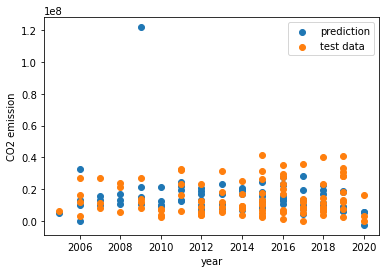

In [67]:
plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

C:\Users\noorw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


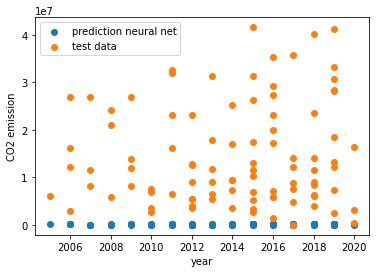

In [75]:
# neural networks

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
pred_nn = regr.predict(X_test)
regr.score(X_test, Y_test)

plt.scatter(X_test[:, 0], pred_nn, label='prediction neural net')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

